Для начало необходимо установить соединение с сервером, на котором размещена база, по протоколу ODBC. Для этого необходимо прописать в скрипте ниже данные сервера и созданной в прошлом пункте базы данных.

In [1]:
import pandas as pd
import pyodbc 
server = 'HOME\SQLEXPRESS' 
database = 'risks' 
username = 'IT' 
password = '1111' 
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


Описательная статистика данных базы  (Выводится описательная статистка данных: период данных, количество эмитентов; общее количество выпусков; мин/макс/средний объем эмиссии(с разбивкой по валютам), структура срочности [краткосрочные, среднесрочные, долгосрочные], [1-2 дополнительных показателя исполнителя]).) прописать скриптами к БД

In [35]:
no = pd.read_sql("select count (distinct [IssuerName]) from [risks].[dbo].[bond_information]", conn)
no1 = pd.read_sql("select count (distinct [ISIN, RegCode, NRDCode]) from [risks].[dbo].[bond_information]", conn)

print ('Количество эмитентов ', no)
print ('Количество выпусков ', no1)

Количество эмитентов        
0  967
Количество выпусков         
0  2935


Выводится запрос на ввод имени эмитента, для которого необходимо получить информацию. Сначала выведем список всех эмитентов.

In [2]:
df = pd.read_sql("SELECT [IssuerName] FROM [risks].[dbo].[bond_information] GROUP BY [IssuerName]", conn)
df

,IssuerName
0,4finance S.A
1,Ak Bars Luxembourg
2,Alfa Bond Issuance
3,Alfa Holding Issuance
4,"Alrosa Finance, Luxemb."
5,BKM Finance
6,Borets Finance
7,BrokerCreditService SP
8,Brunswick Rail Finance
9,Caterpillar InternFinance


Запросим ввести имя эмитента.

In [3]:
OurIssuer = input('Введите имя эмитента ') 

Введите имя эмитента РЖД


In [4]:
OurDate = input('Введите дату в формате YYYY-MM-DD: ')

Введите дату в формате YYYY-MM-DD: 2012-01-01


In [5]:
OurDate=pd.to_datetime(OurDate)
SQLQuery2 = (""" 
SELECT * FROM [risks].[dbo].[bond_information] 
""")
bonds = pd.read_sql(SQLQuery2, conn)
OurBonds = bonds[(bonds['EndMtyDate'] > OurDate) & (bonds['BegDistDate'] < OurDate) & (bonds['IssuerName'] == OurIssuer) & (bonds['FaceFTName'] == 'RUB')]

Выведем информацию по всем облигациям эмитента на заданную дату, срочности облигаций и сроками до погашения

In [6]:
OurBonds

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon
249,RU000A0GJNG2,РЖД,5.000000e+09,2012-11-07,2005-11-18,Корп,Постоянный,0.0,2.0,act/365,RUB,0.0,1000.0,37.650000
1002,RU000A0JQ136,РЖД,1.500000e+10,2013-11-13,2008-11-21,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,27.023033
1005,RU000A0JQ177,РЖД,1.500000e+10,2015-11-18,2008-11-28,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,38.890045
1029,RU000A0JQ4F1,РЖД,1.500000e+10,2014-03-06,2009-03-14,Корп,Постоянный,0.0,2.0,act/365,RUB,0.0,1000.0,74.790000
1030,RU000A0JQ4G9,РЖД,1.500000e+10,2014-03-06,2009-03-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,12.332058
1035,RU000A0JQ4U0,РЖД,1.500000e+10,2015-04-07,2009-04-16,Корп,Постоянный,1.0,2.0,act/365,RUB,0.0,1000.0,42.320182
1054,RU000A0JQ5Q5,РЖД,1.500000e+10,2019-05-16,2009-05-30,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,43.214515
1062,RU000A0JQ656,РЖД,1.500000e+10,2017-06-05,2009-06-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,42.903457
1077,RU000A0JQ6S9,РЖД,1.500000e+10,2016-06-20,2009-07-01,Корп,Постоянный,1.0,2.0,act/365,RUB,0.0,1000.0,45.397030
1088,RU000A0JQ7W9,РЖД,1.500000e+10,2018-07-16,2009-07-29,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,47.466551


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

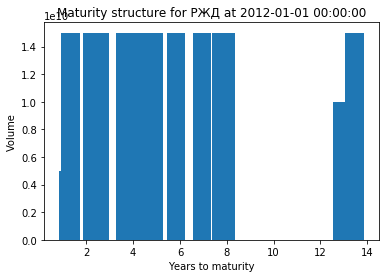

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


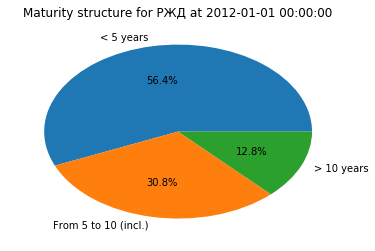

In [7]:
OurBonds.insert(5,'OurDate',OurDate)
OurBonds['time_to_maturity'] = OurBonds['EndMtyDate'] - OurBonds['OurDate']
import numpy as np
OurBonds['time_to_maturity']= (OurBonds['time_to_maturity'] / np.timedelta64(1, 'D')).astype(int)
OurBonds['time_to_maturity'] = OurBonds['time_to_maturity']/365
import matplotlib.pyplot as plt
Volume = OurBonds['SumMarketVal']
Days_to_maturity=OurBonds['time_to_maturity']
plt.bar(Days_to_maturity,Volume, width = 0.8, align = 'edge')
plt.xlabel('Years to maturity')
plt.ylabel('Volume')
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()
OurBonds['<5'] = OurBonds['time_to_maturity'] < 5
OurBonds['>10'] = OurBonds['time_to_maturity'] > 10
a = OurBonds.loc[OurBonds['<5']== True, 'SumMarketVal'].sum()
b = OurBonds.loc[(OurBonds['<5']== False) & ((OurBonds['>10']== False)), 'SumMarketVal'].sum()
c = OurBonds.loc[OurBonds['>10']== True, 'SumMarketVal'].sum()
Volumes = [a,b,c]
Groups = ['< 5 years', 'From 5 to 10 (incl.)', '> 10 years']
plt.pie( Volumes, labels= Groups, shadow=False, autopct='%1.1f%%',)
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()

Запросим ввести ISIN облигации, чтобы получить информацию по облигации и схему платежей, если это возможно

In [16]:
OurISIN = input('введите ISIN одной из облигаций эмитента ') 

введите ISIN одной из облигаций эмитента RU000A0JQM62


                 date  payment
0 2012-12-05 00:00:00  1046.87
1 2012-06-05 12:00:00    46.87
2 2011-12-06 00:00:00    46.87


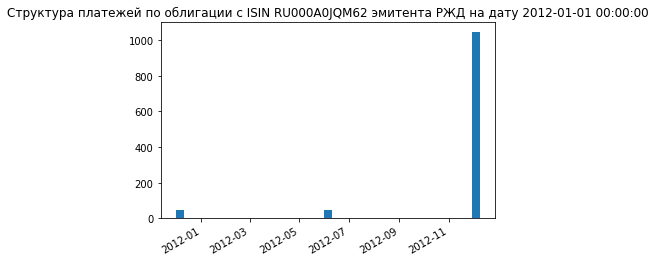

In [18]:
OurBond = OurBonds[OurBonds['ISIN, RegCode, NRDCode'] == OurISIN]
OurBond
if OurBond['CouponType'].all() == 'Постоянный' and OurBond['HaveOffer'].all() == 0 and OurBond['AmortisedMty'].all() == 0:
    structure = pd.DataFrame(data={'date': [], 'payment': []})
    from datetime import datetime, timedelta
    j = OurBond.loc[:,'EndMtyDate'].astype(object).all()
    i=0
    structure.at[i, 'date'] = j
    structure.at[i, 'payment'] = OurBond['coupon'] + OurBond['FaceValue']
    while j >= OurBond['OurDate'].astype(object).all():
        j -= timedelta(days=365/OurBond.loc[:,'CouponPerYear'].sum())
        i += 1
        structure.at[i, 'date'] = j
        structure.at[i, 'payment'] = OurBond['coupon']
    print(structure)
else:
    print('Облигация не подходит: тип ее купона не является постоянным, в облигацию встроена аферта или же она является амортизируемой')

    import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(structure['date'].values,structure['payment'].values, width= 10)
plt.xlabel='Дата платежа'
plt.ylabel='Размер платежа'
plt.title('Структура платежей по облигации с ISIN '+str(OurISIN)+' эмитента '+str(OurIssuer) +' на дату ' + str(OurDate))
fig.autofmt_xdate()
plt.show() 